# Projet IMED S8

Ce projet a pour but de vous faire manipuler ET analyser des images médicales : ici des scans de poumons ayant des tumeurs.
 
<font color="red"> **Rendu attendu** </font> : ce notebook complété et **bien** commenté. Vous devez faire un notebook *didactique* (comprendre : je ne dois pas me dire "mais qu'est-ce que c'est que ce truc ?" en lisant votre code. Je dois comprendre ce qu'il s'est passé dans vos têtes et juste comprendre votre notebook). Les instructions sont écrites en <font color="blue"> bleu </font>. Les projets sont à me rendre par groupes de 2 ou 3.
 
<font color="red"> **Date de rendu** </font> : 30 Août 23h59 (tout retard sera pénalisé). Je vous conseille de me les rendre avant si vous voulez avoir des vacances...

<font color="blue"> **Instructions**: 
    * Etape 1 : Segmentez les poumons (cf TP1)
    * Etape 2 : Segmentez la tumeur
    * Etape 3 : Exploitez vos résultats : 
                ** Quel est le volume de chaque poumon ?
                ** Quelle est la taille des tumeurs ?
    * Critiquez vos résultats : Peut on trouver quel est le poumon gauche ou droit en fonction du volume ? A quel point votre segmentation de tumeur est précise ? 
    
<font color="yellow"> Vous devez donc faire un programme/une fonction/un bout de code qui, pour une image d'entrée, ressort tout ce qui est demandé dans les "Etapes". Je testerai avec une image que vous n'avez pas : je veux donc en sortie une image avec les poumons segmentés (si je peux me balader dans cette image c'est cool, sinon il faut que je puisse choisir la slice affichée), une image avec la tumeur segmentée (pareil), et les volumes. La partie critique doit apparaître à la fin de votre notebook.</font>




<font color="red"> **Données** </font> : <font color="yellow"> Le dossier données comprend les images et les vérités terrains. A chaque image est associée une vérité terrain : cette vérité terrain est là pour vous aider à comprendre où est la tumeur, et pour vous permettre d'évaluer votre segmentation. Attention, quand je testerai votre programme, j'utiliserai des images SANS vérité terrain. Elles ne sont donc là que pour vous permettre de voir où vous en êtes niveau segmentation, ce n'est pas un input supplémentaire.</font> 


In [1]:
import os
import glob
import numpy as np
import scipy as sp
import nibabel as nib
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline
import pickle
from skimage.transform import resize
import os

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tifoprstim/donnees/images/lung_010.nii
/kaggle/input/tifoprstim/donnees/images/lung_001.nii
/kaggle/input/tifoprstim/donnees/images/lung_009.nii
/kaggle/input/tifoprstim/donnees/images/lung_003.nii
/kaggle/input/tifoprstim/donnees/images/lung_005.nii
/kaggle/input/tifoprstim/donnees/images/lung_006.nii
/kaggle/input/tifoprstim/donnees/images/lung_004.nii
/kaggle/input/tifoprstim/donnees/verites_terrain/lung_010.nii
/kaggle/input/tifoprstim/donnees/verites_terrain/lung_001.nii
/kaggle/input/tifoprstim/donnees/verites_terrain/lung_009.nii
/kaggle/input/tifoprstim/donnees/verites_terrain/lung_003.nii
/kaggle/input/tifoprstim/donnees/verites_terrain/lung_005.nii
/kaggle/input/tifoprstim/donnees/verites_terrain/lung_006.nii
/kaggle/input/tifoprstim/donnees/verites_terrain/lung_004.nii
/kaggle/input/trained/IMED_50epochs_axialT.hdf5
/kaggle/input/trained/IMED_50epochs_axialT_history


In [3]:
def show_axial(im_arr, t_imarr, mr_slice):
    """Show an axial slice of a MR image.

    Parameters
    ----------
    im_arr: 3D array 
        the MR image to show
    mr_slice: int
        a slice number
    """
    #plt.imshow(im_arr[:, :, mr_slice].T, cmap="gray")
    #plt.figure(figsize=(20,20))
    f, axarr = plt.subplots(1, 2)

    axarr[0].imshow(im_arr[:,:, mr_slice].T, cmap="gray")
    axarr[1].imshow(t_imarr[:,:, mr_slice].T, cmap="gray")
    
    plt.show()
    
    plt.axis('off')
    #plt.pause(0.1)

In [4]:
img = nib.load("/kaggle/input/tifoprstim/donnees/images/lung_003.nii")
dat = img.get_fdata()
# t_img = nib.load("/kaggle/input/tifoprstim/donnees/verites_terrain/lung_005.nii")
# t_dat = t_img.get_fdata()

In [5]:
# show_axial(dat, t_dat, 550)

STEP 1 :

In [6]:
# UTILS http://ric.uthscsa.edu/mango/papaya/index.html

def normalize(img):
    # USED FOR NORMALIZATION
    img -= img.min()
    img /= img.max()
    return img

def standardize(img):
    # USED FOR STANDARDIZATION
    mean, deviation = img.mean(), img.std()
    img = (img - mean) / deviation
    return img

from skimage.filters import threshold_otsu

def binarize(img):
    t = threshold_otsu(img)
    return t < img

In [7]:
from skimage.morphology import closing, cube
from skimage.segmentation import clear_border

def lungs_morpho(data):
    print("Reshaping", data.shape[2])
    reshaped = np.array([data[:, :, i].T for i in range(data.shape[2])])
    print("Binarization")
    binarized = binarize(reshaped)
    print("Reversing")
    notbinarized = ~binarized
    print("Closing")
    completed = closing(notbinarized, cube(10))
    print("Suppressing Border")
    cleared = np.array([clear_border(x) for x in completed])
    return cleared

In [8]:
lungs_mask = lungs_morpho(dat)

Reshaping 288
Binarization
Reversing
Closing
Suppressing Border


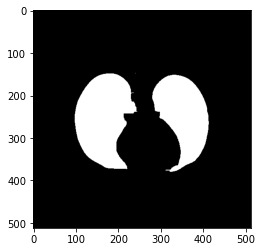

In [9]:
plt.imshow(lungs_mask[int(lungs_mask.shape[0] / 2)], cmap='gray')

In [10]:
# sx, sy, sz = dat.shape
# interactive_plot = interactive(show_axial, im_arr=fixed(dat), t_imarr=fixed(t_dat), mr_slice=(0, sx - 1))

In [11]:
# interactive_plot

STEP 2 :

In [12]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, UpSampling2D, concatenate, Conv2DTranspose
def unet(pretrained_weights = None, input_size = (256, 256, 1)):
    inputs = Input(shape=input_size, name='cnn_input')
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2DTranspose(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([conv4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.summary()
    
    if(pretrained_weights):
    	model.load_weights(pretrained_weights)
    
    return model

In [13]:
def prepare_dataset(data_path):
    images_path = os.path.join(data_path, 'images')
    print("Loader")
    images = [normalize(np.transpose(nib.load(os.path.join(images_path, files)).get_fdata(), (2,0,1))) for files in sorted(os.listdir(images_path))]
    print("Stacking")
    images = np.vstack(images)
    print("Resizing")
    images = np.array([resize(image, (256,256)) for image in images])
    print("Transposing")
    images = np.array([np.transpose(x) for x in images])
    
    truth_path = os.path.join(data_path, 'verites_terrain')
    print("Loader")
    truths = [np.transpose(nib.load(os.path.join(truth_path, files)).get_fdata(), (2,0,1)) for files in sorted(os.listdir(truth_path))]
    print("Stacking")
    truths = np.vstack(truths)
    print("Resizing")
    truths = np.array([resize(truth, (256,256)) for truth in truths])
    print("Transposing")
    truths = np.array([np.transpose(x) for x in truths])
    truths = truths.astype(np.float32)
    return images, truths

In [14]:
def add_last_dimension(image):
    return np.reshape(image, (image.shape[0], image.shape[1], image.shape[2], 1))
def remove_last_dimension(image):
    return np.reshape(image, (image.shape[0], image.shape[1], image.shape[2]))

In [15]:
from sklearn.model_selection import train_test_split

X, Y = prepare_dataset('/kaggle/input/tifoprstim/donnees')
x_train, x_test, y_train, y_test = train_test_split(X, Y)
x_train, x_test, y_train, y_test = add_last_dimension(x_train), add_last_dimension(x_test), add_last_dimension(y_train), add_last_dimension(y_test)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Loader
Stacking
Resizing
Transposing
Loader
Stacking
Resizing
Transposing
(1729, 256, 256, 1) (577, 256, 256, 1) (1729, 256, 256, 1) (577, 256, 256, 1)


In [16]:
# plt.imshow(remove_last_dimension(X[300]), cmap='gray')

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = unet(input_size=(256, 256, 1))
# checkpoint = ModelCheckpoint('best_model.hdf5', monitor='val_loss', verbose=1, mode='min', save_best_only=True)
# batch_size = 16
# epochs = 50

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cnn_input (InputLayer)          [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         cnn_input[0][0]                  
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [18]:
# history = model.fit(
#     x=x_train,
#     y=y_train,
#     batch_size=batch_size,
#     epochs=epochs,
#     verbose=1,
#     callbacks=[checkpoint],
#     validation_split=0.2,
# )

# with open('best_model_history', 'wb') as file_pi:
#     pickle.dump(history.history, file_pi)

19/19 [==============================] - 6s 296ms/step - loss: 2.9926e-04 - accuracy: 0.9996
Test Loss, Test Accuracy :  [0.0002992626978084445, 0.9995521306991577]


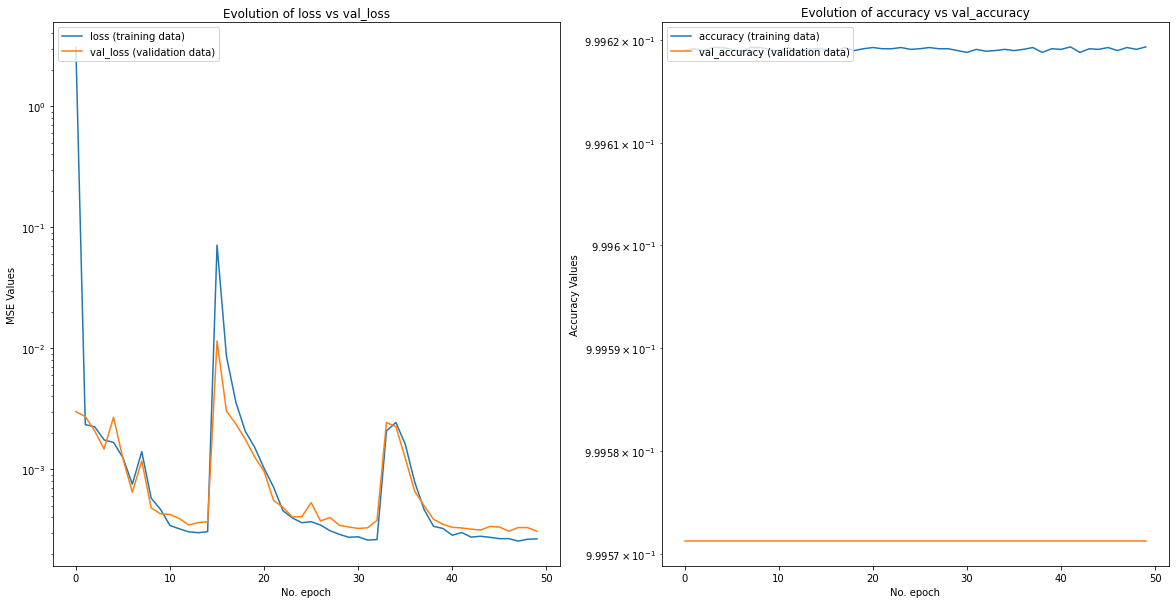

In [19]:
model.load_weights('../input/trained/IMED_50epochs_axialT.hdf5')
res = model.predict(x_test)
score = model.evaluate(x_test, y_test)
print("Test Loss, Test Accuracy : ", score)

history = pickle.load(open('../input/trained/IMED_50epochs_axialT_history', "rb"))
fig, axes = plt.subplots(1, 2, figsize=(20, 10), squeeze=False)
axes[0, 0].plot(history['loss'], label='loss (training data)')
axes[0, 0].plot(history['val_loss'], label='val_loss (validation data)')
axes[0, 0].set_title('Evolution of loss vs val_loss')
axes[0, 0].set_ylabel('MSE Values')
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlabel('No. epoch')
axes[0, 0].legend(loc="upper left")

axes[0, 1].plot(history['accuracy'], label='accuracy (training data)')
axes[0, 1].plot(history['val_accuracy'], label='val_accuracy (validation data)')
axes[0, 1].set_title('Evolution of accuracy vs val_accuracy')
axes[0, 1].set_ylabel('Accuracy Values')
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlabel('No. epoch')
axes[0, 1].legend(loc="upper left")

plt.show()

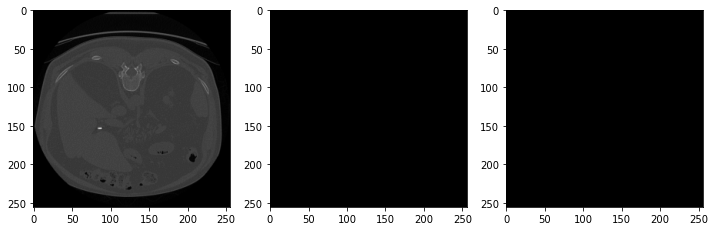

In [20]:
def plot_inputs(x, mask, y, cmap=None):
    if cmap == 'gray':
        x = x.reshape(x.shape[0], x.shape[1])
        mask = mask.reshape(mask.shape[0], mask.shape[1])
        y = y.reshape(y.shape[0], y.shape[1])
    
    fig, axes = plt.subplots(1, 3, figsize=(12,8), squeeze=False)
    axes[0,0].imshow(x, cmap=cmap, vmin=0, vmax=1)
    axes[0,0].label = 'x'
    axes[0,1].imshow(mask, cmap=cmap, vmin=0, vmax=1)
    axes[0,0].label = 'mask or prediction'
    axes[0,2].imshow(y, cmap=cmap, vmin=0, vmax=1)
    axes[0,2].label = 'gt'

index = np.random.randint(x_test.shape[0])
plot_inputs(x_test[index], y_test[index], res[index], cmap="gray")

STEP 3 :
VOLUME DES POUMONS

In [21]:
def volume_calculation(lungs_mask):
    print("{} marked points on {}".format(lungs_mask.sum(), lungs_mask.size))
    print("{}% of the patient".format((lungs_mask.sum() / lungs_mask.size)  * 100))
    spacing_x, spacing_y, spacing_z = img.header.get_zooms()
    milli_vol = lungs_mask.sum() * spacing_x * spacing_y * spacing_z
    print("Volume is {} millimeters^3".format(milli_vol))
    print("The medium size is {} centimeters".format(np.cbrt(milli_vol) / 10))
    print("Volume is {} liters".format(milli_vol / 1e+6))
    return milli_vol / 1e+6

liters = volume_calculation(lungs_mask)

6704219 marked points on 75497472
8.880057599809435% of the patient
Volume is 7339900.331651105 millimeters^3
The medium size is 19.43405321341275 centimeters
Volume is 7.339900331651105 liters


- La valeure du volume des poumons coincide bien avec les données connues du corps médical
- [Volume moyens des poumons](https://en.wikipedia.org/wiki/Lung_volumes)

STEP 3 : VOLUME DE LA TUMEUR

In [22]:
def create_mask(lungs_dat, model):
    print("Doing prediction")
    tumor_pred = model.predict(lungs_dat)
    print("Masking prediction")
    tumor_pred = remove_last_dimension(tumor_pred)
    tumor_mask = np.where(tumor_pred > 0.35, True, False)
    return tumor_mask

def nib_to_model(image_path):
    images = normalize(np.transpose(nib.load(image_path).get_fdata(), (2,0,1)))
    images = np.array([resize(image, (256,256)) for image in images])
    images = np.array([np.transpose(x) for x in images])
    images = add_last_dimension(images)
    return images

In [23]:
sanit_data = nib_to_model(image_path="../input/tifoprstim/donnees/images/lung_010.nii")
tumor_mask = create_mask(sanit_data, model)
tumor_vol = volume_calculation(np.array([resize(image, (512, 512)) for image in tumor_mask]))

Doing prediction
Masking prediction
26724.000000000004 marked points on 63176704
0.04230040237616702% of the patient
Volume is 29257.919000415135 millimeters^3
The medium size is 3.0813981045246814 centimeters
Volume is 0.029257919000415133 liters


- La valeure de la taille de la tumeur coincide bien avec les données connues du corps médical
- [Taille moyenne d'une tumeur](https://www.ncbi.nlm.nih.gov/books/NBK65925/figure/CDR0000062967__259/)

CRITICS : SEPARATION DES DEUX POUMONS

In [24]:
from sklearn.cluster import KMeans

def lungs_separation(lungs_mask):
    marking_positions = np.argwhere(lungs_mask)
    kmeans = KMeans(n_clusters=2).fit(marking_positions)
    new_result = kmeans.predict(marking_positions)
    colored_lungs = np.zeros((lungs_mask.shape[0], lungs_mask.shape[1], lungs_mask.shape[2], 3))
    for pos, classres in zip(marking_positions, new_result):
        if classres == 0:
            colored_lungs[pos[0], pos[1], pos[2]] = np.array([1, 0, 0])
        else:
            colored_lungs[pos[0], pos[1], pos[2]] = np.array([0, 1, 0])
    return colored_lungs

colored_lungs = lungs_separation(lungs_mask)

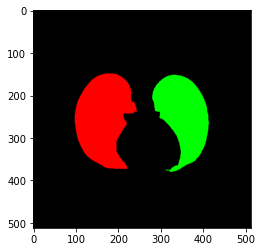

In [25]:
plt.imshow(colored_lungs[int(lungs_mask.shape[0] / 2)])

CRITIQUE : PRECISION DE LA SEGMENTATION DE TUMEUR
 
Etant donné que nous avons utilisé du Machine Learning la précision de notre segmentation fait du sens uniquement sur les données de test
 
Les résultats de train seront aussi joints mais nous avons conscience qu'ils ne sont pas vraiment meaningfull.

In [26]:
from sklearn.metrics import f1_score

model.load_weights('../input/trained/IMED_50epochs_axialT.hdf5')

# Evaluation
score = model.evaluate(x_test, y_test)
print("Test Loss, Test Accuracy : ", score)
# Prediction
prediction = model.predict(x_test)
prediction = np.where(prediction > 0.35, 1, 0).astype('bool')
label = y_test.astype('bool')
dice = f1_score(prediction.reshape(-1), label.reshape(-1))
print("Dice Score is {} on test data".format(dice))

19/19 [==============================] - 6s 295ms/step - loss: 2.9926e-04 - accuracy: 0.9996
Test Loss, Test Accuracy :  [0.0002992626978084445, 0.9995521306991577]
Dice Score is 0.8419992615219362 on test data


In [27]:
# Evaluation
score = model.evaluate(X, Y)
print("Plain Loss, Plain Accuracy : ", score)
# Prediction
prediction = model.predict(X)
prediction = np.where(prediction > 0.35, 1, 0).astype('bool')
label = Y.astype('bool')
dice = f1_score(prediction.reshape(-1), label.reshape(-1))
print("Dice Score is {} on whole data".format(dice))

73/73 [==============================] - 24s 328ms/step - loss: 2.5496e-04 - accuracy: 0.9996
Plain Loss, Plain Accuracy :  [0.000254961138125509, 0.9996204376220703]
Dice Score is 0.8365732323736839 on whole data
